# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Так мы фиксируем, чтобы наши псевдо-случайные числа генерировались в коде по одному и тому же принципу псевдо-случайности. (еще можно ответить так: для воспроизводимости наших манипуляций с данными)

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [223]:
#import pandas as pd

#df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
#df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

#print("Train data shape:", df_train.shape)
#print("Test data shape: ", df_test.shape)

У меня не загружались файлы csv, так что пришлось попросить помочь с этим ИИ: 

In [247]:
import pandas as pd
import requests
import certifi
import ssl
from io import StringIO

# Создаем контекст SSL с использованием сертификатов из certifi
ssl_context = ssl.create_default_context(cafile=certifi.where())

train_url = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv'
test_url = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv'

# Загрузка данных с использованием корректного SSL-сертификата
train_response = requests.get(train_url, verify=certifi.where())
test_response = requests.get(test_url, verify=certifi.where())

df_train = pd.read_csv(StringIO(train_response.text))
df_test = pd.read_csv(StringIO(test_response.text))

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [225]:
# 10 случайных строк тренировочного датасета
print(df_train.sample(n=10))

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

In [226]:
# первые 5 объектов тестового датасета
print(df_test.head(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

In [227]:
# последние 5 объектов тестового датасета
print(df_test.tail(5))

                                 name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995  

In [228]:
# есть ли в датасете пропуски
print(df_train.isna())

       name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
6994  False  False          False      False  False        False   
6995  False  False          False      False  False        False   
6996  False  False          False      False  False        False   
6997  False  False          False      False  False        False   
6998  False  False          False      False  False        False   

      transmission  owner  mileage  engine  max_power  torque  seats  
0            False  False    False   False      False   False  False  
1            False  False    False   Fals

In [229]:
# выведите названия колонок, для которых есть пропущенные значения
print(df_train.columns[df_train.isna().any()])

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


In [230]:
# есть ли в данных явные дубликаты
print(df_train.duplicated())
print(df_test.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [248]:
# поскольку медиану можем посчитать только для числовых значений, 
# то применим функцию только к числовым строкам df_train 
# (и потом ими же заполним пропуски в тестовом датасете):
num_col = df_train.select_dtypes(include=['number'])

medians = num_col.median()
df_train[num_col.columns] = df_train[num_col.columns].fillna(medians)
df_test[num_col.columns] = df_test[num_col.columns].fillna(medians)

print(df_train.isnull().sum())
print(df_test.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64


### **Задание 2 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [249]:
# я так понимаю, у нас целевая переменная -- это цена автомобиля.
# делаем копию датасета без целевой переменной
df_train_dupl = df_train.drop(columns=['selling_price'])


In [233]:
# ищем объекты с одинаковым признаковым описанием
duplicates = df_train_dupl.duplicated(keep=False)
# и отображаем их
print(df_train[duplicates])

                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4

In [250]:
# удаляем повторяющиеся строки 
df_train = df_train.drop_duplicates(subset=df_train_dupl.columns, keep='first')

In [251]:
# ищем объекты с одинаковым признаковым описанием, но с разными ценами
price_diff = df_train.duplicated(subset=df_train_dupl.columns.tolist(), keep=False) & ~df_train.duplicated(subset=df_train_dupl.columns.tolist() + ['selling_price'], keep=False)

# выведем число объектов с одинаковым признаковым описанием, 
# но с разными ценами (таких 321 штука)
with_price_diff = price_diff.sum()
print(f"Количество объектов с одинаковым признаковым описанием, но с разными ценами: {with_price_diff}")

Количество объектов с одинаковым признаковым описанием, но с разными ценами: 0


In [252]:
# оставляем только первое упоминание таких объектов
df_train = df_train[~price_diff].drop_duplicates(subset=df_train_dupl.columns.tolist(), keep='first')

In [253]:
# обновляем индексы строк
df_train.reset_index(drop=True, inplace=True)

# проверяем, что повторяющиеся строки удалены
# пишет, что у нас [5691 rows x 13 columns] 
print(df_train)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual

Видимо, что-то не так сделала, раз в assert другие числа для проверки... 

Но, кстати, когда я сначала, не поняв задание, удалила все дубликаты (без проверки различия цен у дубликатов), то цифры совпали с теми, что в assert (внизу сохранен код и вывод).

код:
df_train_clean = df_train.drop_duplicates(subset=df_train_dupl.columns, keep='first')
print(df_train_clean.shape)

вывод: 
(5840, 13)

In [254]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [239]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [255]:
# преобразование нечисловых столбцов в числовые
for col in df_train.select_dtypes(include=['object']):
    df_train[col], _ = pd.factorize(df_train[col])
    df_test[col], _ = pd.factorize(df_test[col])

medians = df_train.median()

df_train[num_col.columns] = df_train[num_col.columns].fillna(medians)
df_test[num_col.columns] = df_test[num_col.columns].fillna(medians)

# на выходе получаем 0 пропущенных для обоих датасетов
print(df_train.isnull().sum())
print(df_test.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


### **Задание 4 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [256]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные распределения.

- Видим в выводе после применения .describe(), что большинство автомобилей выпущены в период с 2011 по 2017 годы.
Стандартное отклонение небольшое, что говорит о небольшом разбросе лет выпуска.

- По переменной selling_price у нас большой разброс. Между минимальным и максимальным значением цены огромная разница -- возможно, есть выбросы.

- Что касается категориальных данных, они у нас смешались с числовыми.

In [257]:
# для числовых столбцов
df_train.describe(include=['int'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,5840.000000,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,624.981507,2013.428425,5.229601e+05,7.395224e+04,0.478938,0.109932,0.086301,0.510788,97.538356,20.273116,74.332534,82.729110,5.426712
std,517.381540,4.095622,5.354320e+05,6.007114e+04,0.559128,0.326231,0.280833,0.746668,83.532566,23.859910,66.056407,86.779916,0.982344
min,0.000000,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
25%,191.000000,2011.000000,2.500000e+05,3.900000e+04,0.000000,0.000000,0.000000,0.000000,26.000000,3.000000,17.000000,15.000000,5.000000
50%,471.000000,2014.000000,4.050000e+05,7.000000e+04,0.000000,0.000000,0.000000,0.000000,78.000000,11.000000,56.000000,51.000000,5.000000
75%,967.250000,2017.000000,6.400000e+05,1.000000e+05,1.000000,0.000000,0.000000,1.000000,142.000000,31.000000,113.000000,120.000000,5.000000
max,1923.000000,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,385.000000,119.000000,315.000000,418.000000,14.000000


In [258]:
# выдает ошибку, тк мы уже преобразовали все столбцы в числовые ранее
df_train.describe(include=['object'])

ValueError: No objects to concatenate

In [259]:
df_train.shape

(5840, 13)

In [260]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 13), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Я, если честно, не очень понимаю, как по этой куче графиков понять, можно ли предположить связь признаков с целевой переменной. (Вернее, можно, конечно, но придется очень сильно вглядываться). 

Я предполагаю, что с ценой будут связаны год выпуска и мощность двигателя.

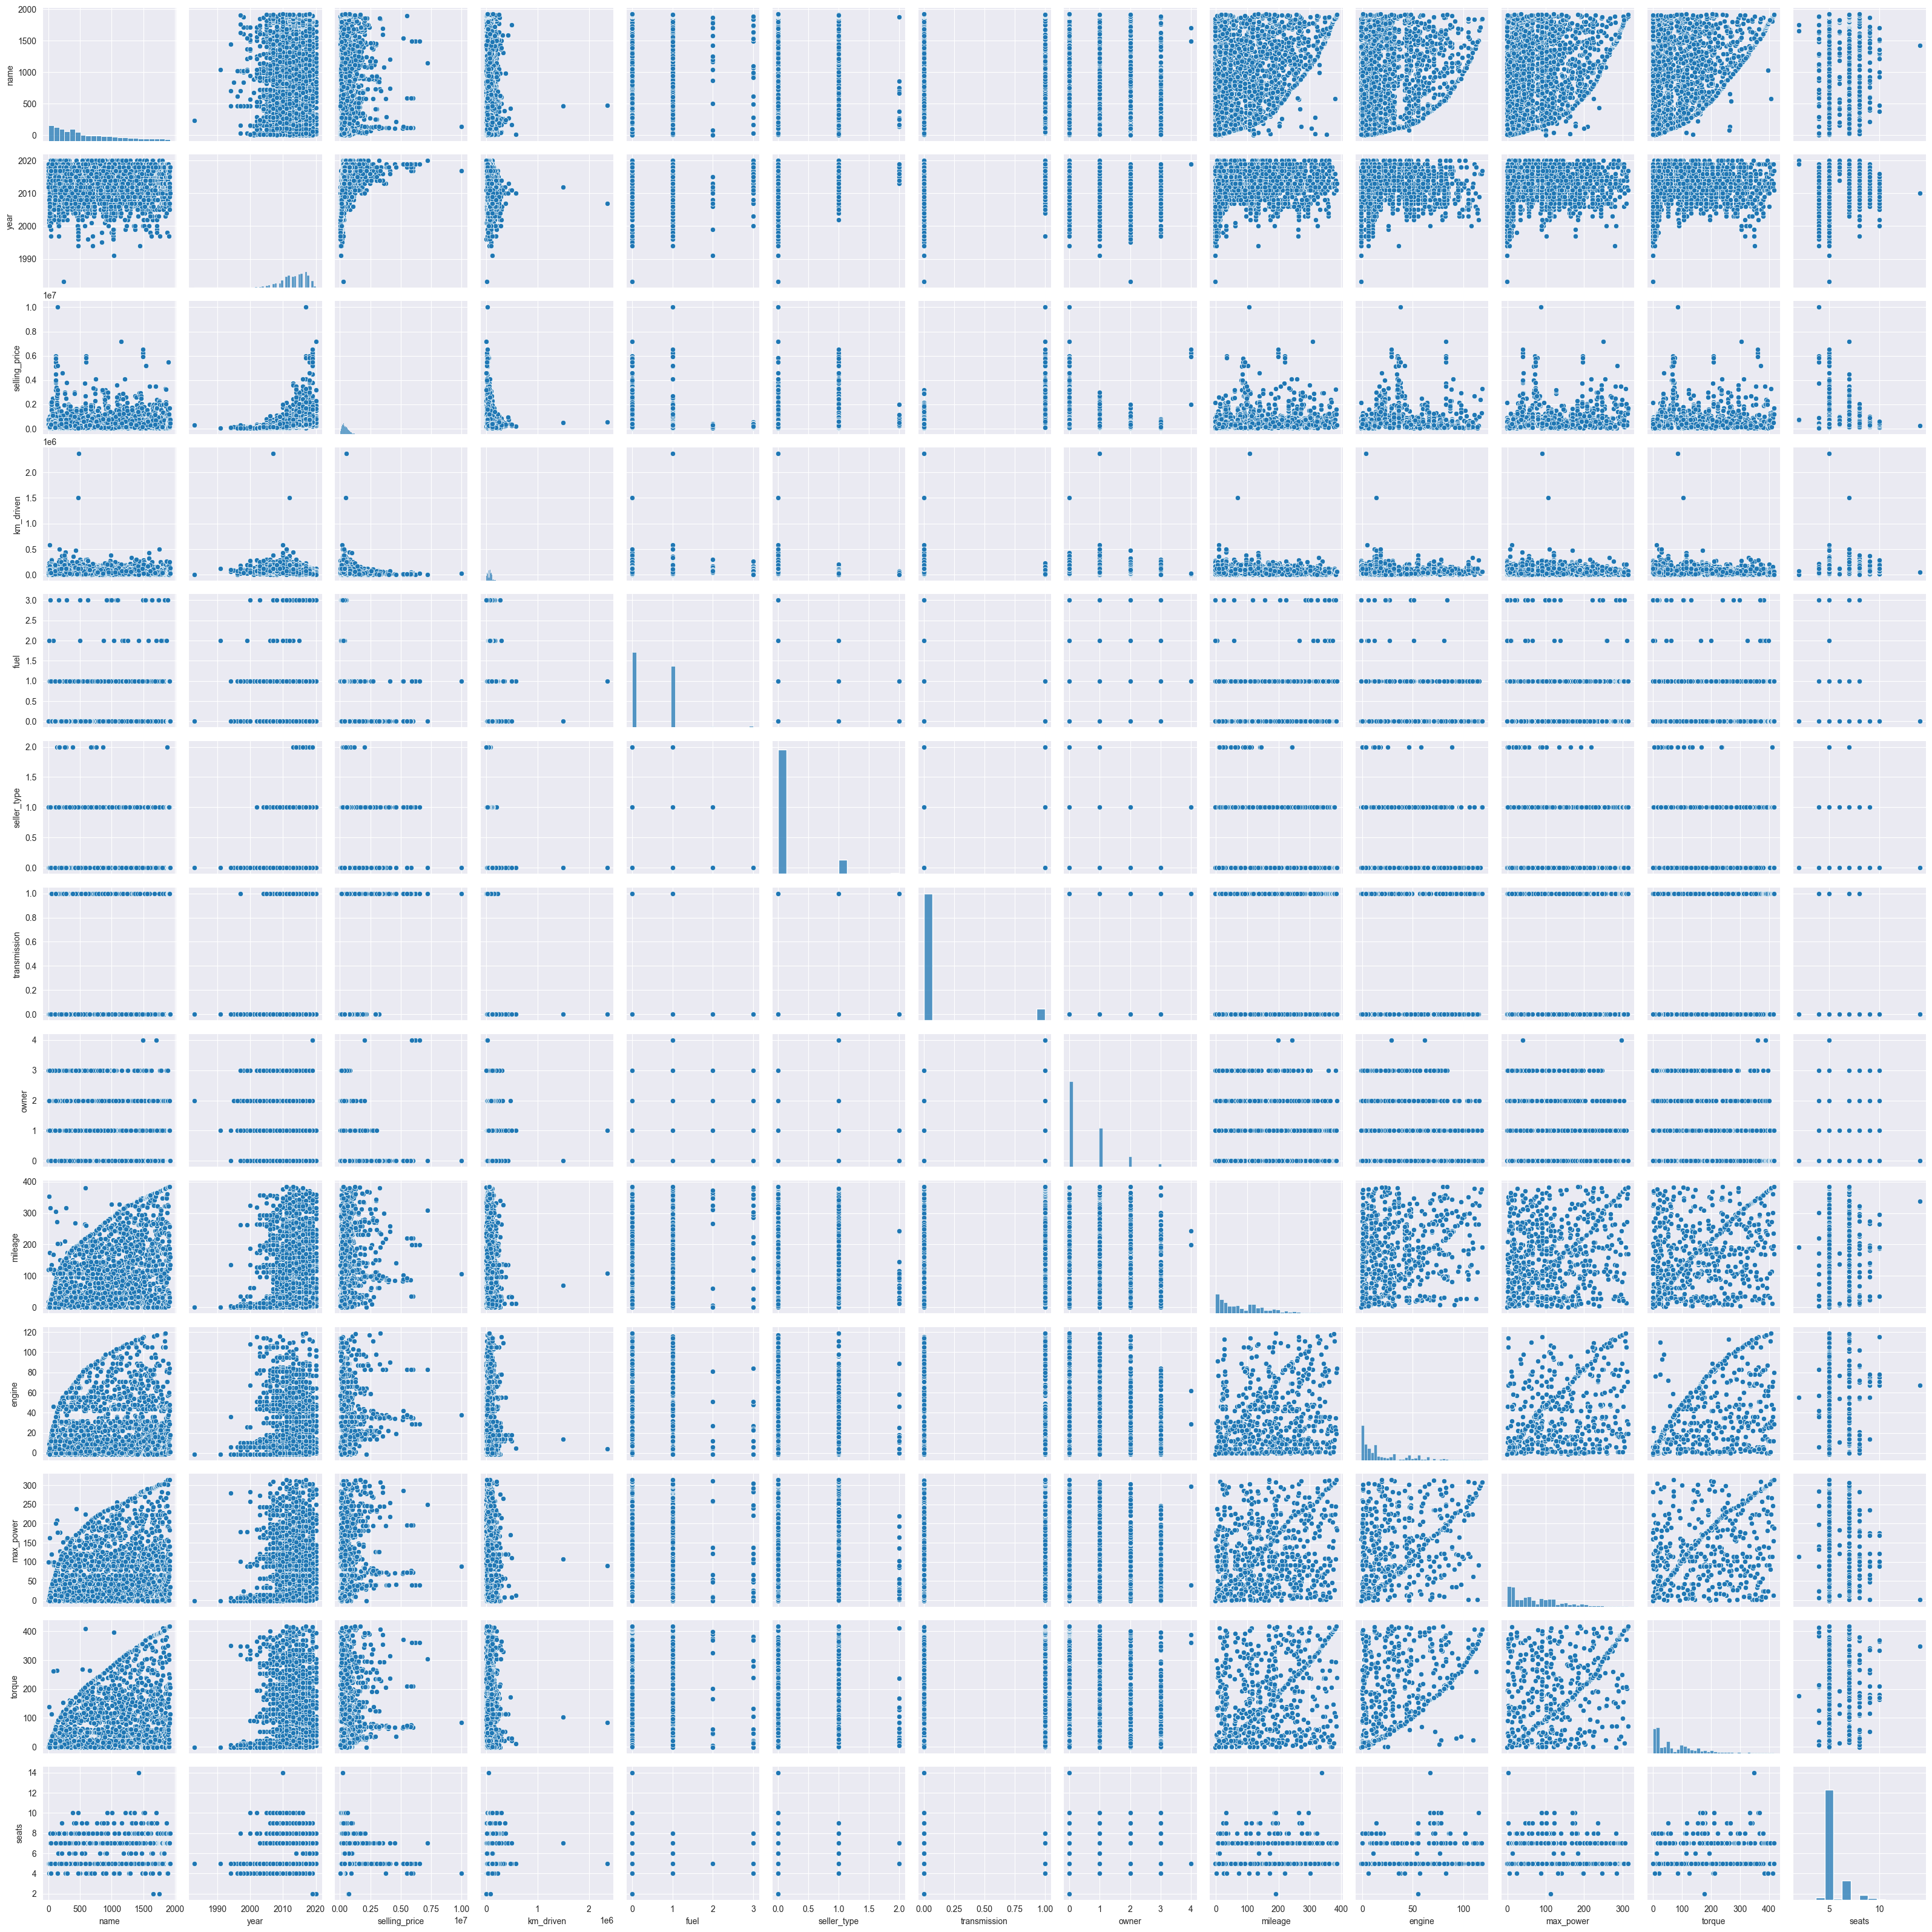

In [261]:
sns.set_style('darkgrid')
sns.pairplot(df_train)

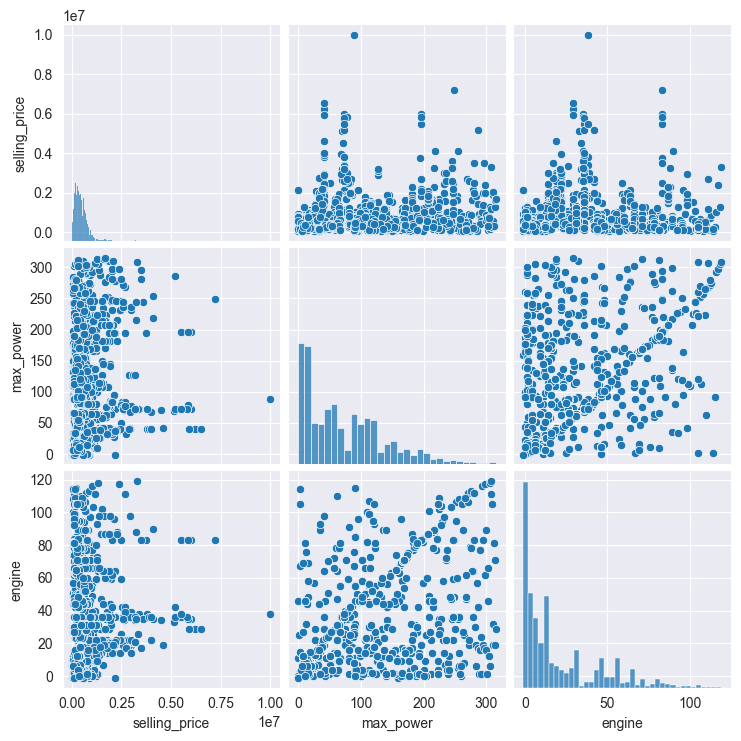

In [262]:
cols_to_plot = ['selling_price', 'max_power', 'engine']
sns.pairplot(df_train[cols_to_plot])

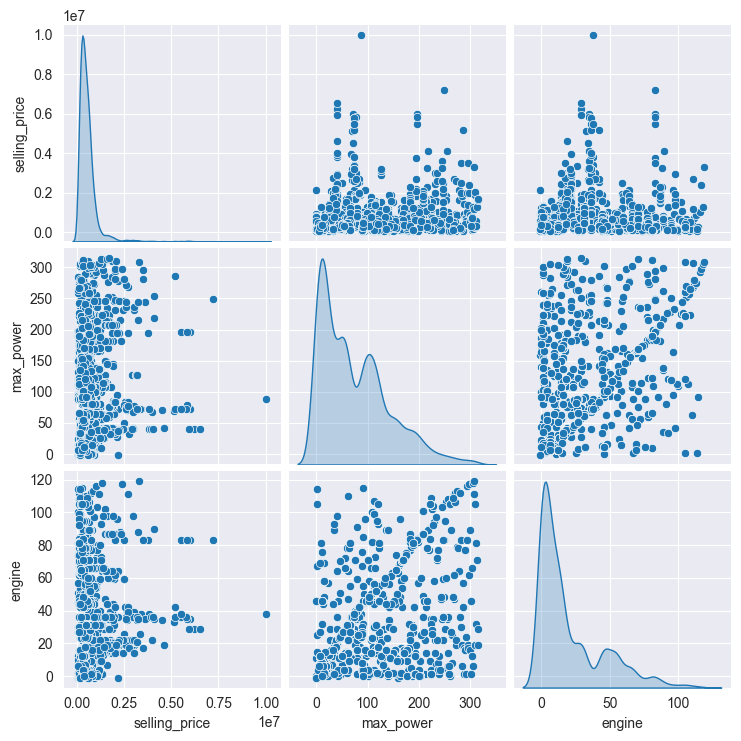

In [263]:
sns.pairplot(df_train[cols_to_plot], diag_kind='kde')

 - Можно ли предположить на основе распределений связь признаков с целевой переменной?

 
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

- Ну вот выше, где мы смотрим 'selling_price', 'max_power', 'engine', вроде выглядит так, что эти признаки с ценой не особо связаны...
- Что касается корреляции, то как будто можем предположить, что max_power и engine коррелируют (остальные не похоже, что коррелируют)

### **Задание 7 (1.5 балла)**

Итак, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [ ]:
# использование pd.corr() выдавало ошибку, так что использовала просто corr()
print(df_train.corr())

<Axes: >

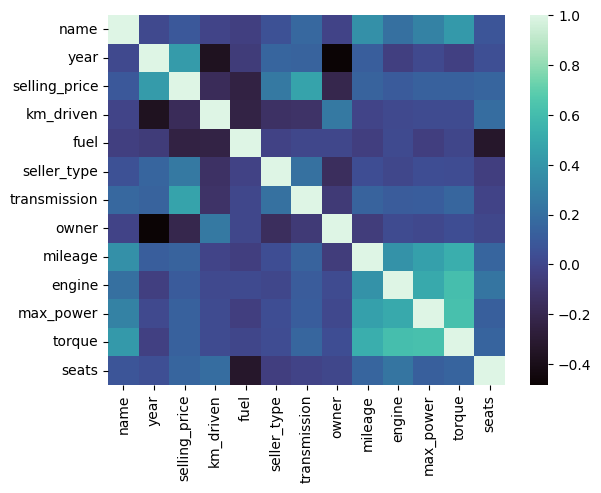

In [ ]:
# строим тепловую карту
cor_matrix = df_train.corr()
sns.heatmap(cor_matrix, cmap="mako")

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответы:
- Наименее скоррелированы между собой fuel и transmission. 
- Между year и selling_price, а также между name и torque наблюдается довольно сильная положительная линейная зависимость.
- Да, правильно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

кроме того, судя по тепловой карте, предположение о корреляции между engine и max_power подтвердилось. а вот гипотеза о связи мощности и цены не совсем подтвердилась (связь слабая).

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


модель линейной регрессии обучается только на вещественных признаках, потому что таково требование к переменным, которые включаются в нее -- они должны все быть числовыми.

### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [266]:
from sklearn.model_selection import train_test_split
import re

# функция для извлечения чисел из ячеек, где еще содержатся буквы/единицы измерения
def extract_numbers(value):
    if isinstance(value, str):
        numbers = re.findall(r'\d+\.?\d*', value)
        if numbers:
            return float(numbers[0])
        return None
    return value

# удаление категориальных столбцов, кроме seats
num_cols_train = df_train.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])
num_cols_test = df_test.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])

for col in num_cols_train.columns:
    num_cols_train[col] = num_cols_train[col].apply(extract_numbers)
  #   num_cols_train[col] = num_cols_train[col].apply(lambda x: float(x[0]) if isinstance(x, list) and len(x) > 0 else None)

for col in num_cols_test.columns:
    num_cols_test[col] = num_cols_test[col].apply(extract_numbers)
   #  num_cols_test[col] = num_cols_test[col].apply(lambda x: float(x[0]) if isinstance(x, list) and len(x) > 0 else None)

y_train = num_cols_train['selling_price'] 
x_train = num_cols_train.drop(columns=['selling_price'])

y_test = num_cols_test['selling_price']
x_test = num_cols_test.drop(columns=['selling_price'])

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
assert x_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [ ]:
assert x_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
    
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [268]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Тренировочный набор: R^2 = {train_r2:.4f}, MSE = {train_mse:.4f}")
print(f"Тестовый набор: R^2 = {test_r2:.4f}, MSE = {test_mse:.4f}")

Тренировочный набор: R^2 = 0.2185, MSE = 224002428556.3187
Тестовый набор: R^2 = 0.1634, MSE = 480912577772.9599


Видим, что здесь у нас высокие значения MSE как на тренировочном, так и на тестовом наборе. Видимо, модель плохо предсказывает целевую переменную. R-квадрат достаточно низкий на обоих наборах, но на тестовом он хуже, чем на тренировочном, что также говорит о том, что модель у нас посредственная.

Возможно, линейная регрессия не подходит для этих данных.

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# обучение стандартизатора:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Теперь можно использовать стандартизированные данные для обучения модели
model.fit(x_train_scaled, y_train)

# предсказываем на стандартизированных данных
y_train_pred_scaled = model.predict(x_train_scaled)
y_test_pred_scaled = model.predict(x_test_scaled)

# оцениваем качество модели 
train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)

train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)

print(f"Тренировочный набор (стандартизированный): R2 = {train_r2_scaled:.4f}, MSE = {train_mse_scaled:.4f}")
print(f"Тестовый набор (стандартизированный): R2 = {test_r2_scaled:.4f}, MSE = {test_mse_scaled:.4f}")

Тренировочный набор (стандартизированный): R2 = 0.2185, MSE = 224002428556.3187
Тестовый набор (стандартизированный): R2 = 0.1634, MSE = 480912577772.9439


После стандартизации особо ничего не поменялось в значениях метрик. Модель все еще плохая.

### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

Самым информативным в предсказании цены оказался год, у него значение коэффициента самое большое по модулю и равно более 220 000.

In [ ]:
print(x_test.sample(5))

print(f"Коэффициенты: {model.coef_}")

     year  km_driven  mileage  engine  max_power  torque  seats
176  2006     100000       95       1         82      92    5.0
618  2014      20000       43      30         39      43    5.0
249  2013      79328      119      22        103     115    7.0
872  2012      90000      191      40        147     174    5.0
205  2013      46000       56      29         58     102    5.0
Коэффициенты: [220194.04224265 -21098.73322092  -2580.36192469   6989.2775659
  24432.72667811  49559.31033265  63696.04596397]


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

1) Качество Лассо-регрессии: она не улучшила точность предсказаний по сравнению с линейной регрессией.
2) L1-регуляризация не занулила веса ни у одного коэффициента. Возможно, все признаки хоть как-то, но связаны с целевой переменной, поэтому регрессия может не занулять их?

In [269]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

# обучение модели на тренировочных данных
lasso_model.fit(x_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(x_train_scaled)
y_test_pred_lasso = lasso_model.predict(x_test_scaled)

# оценка качества модели
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

train_mse_lasso = MSE(y_train, y_train_pred_lasso)
test_mse_lasso = MSE(y_test, y_test_pred_lasso)

print("Модель Lasso регрессии:")
print(f"Коэффициенты: {lasso_model.coef_}")
print(f"Свободный член: {lasso_model.intercept_}")
print(f"R2 на тренировочном наборе: {train_r2_lasso:.4f}")
print(f"R2 на тестовом наборе: {test_r2_lasso:.4f}")
print(f"MSE на тренировочном наборе: {train_mse_lasso:.4f}")
print(f"MSE на тестовом наборе: {test_mse_lasso:.4f}")

# проверка на зануление весов
zero_weights = np.sum(lasso_model.coef_ == 0)
print(f"Количество зануленных весов: {zero_weights}")

Модель Lasso регрессии:
Коэффициенты: [220193.086876   -21097.78740927  -2577.80339375   6988.86472982
  24431.95370328  49557.80867917  63694.9339169 ]
Свободный член: 522960.09109588526
R2 на тренировочном наборе: 0.2185
R2 на тестовом наборе: 0.1634
MSE на тренировочном наборе: 224002428564.3627
MSE на тестовом наборе: 480913133170.2388
Количество зануленных весов: 0


### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

- GridSearchCV обучил 60 моделей.
- Коэффициент регуляризации у лучшей модели: 100.
- Никакие веса не занулились. 

In [270]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso = Lasso()

# создаем GridSearchCV с 10-ю фолдами и обучаем ее
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

# получаем наилучшую модель
best_lasso_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_train_pred_best_lasso = best_lasso_model.predict(x_train_scaled)
y_test_pred_best_lasso = best_lasso_model.predict(x_test_scaled)

# оценка качества 
train_r2_best_lasso = r2_score(y_train, y_train_pred_best_lasso)
test_r2_best_lasso = r2_score(y_test, y_test_pred_best_lasso)

train_mse_best_lasso = MSE(y_train, y_train_pred_best_lasso)
test_mse_best_lasso = MSE(y_test, y_test_pred_best_lasso)

print("Информация о лучшей модели Lasso регрессии:")
print(f"Лучшие параметры: {best_params}")
print(f"Коэффициенты: {best_lasso_model.coef_}")
print(f"Свободный член (intercept): {best_lasso_model.intercept_}")
print(f"R^2 на тренировочном наборе: {train_r2_best_lasso:.4f}")
print(f"R^2 на тестовом наборе: {test_r2_best_lasso:.4f}")
print(f"MSE на тренировочном наборе: {train_mse_best_lasso:.4f}")
print(f"MSE на тестовом наборе: {test_mse_best_lasso:.4f}")

# проверяем, занулила ли L1-регуляризация какие-нибудь веса
zero_weights = np.sum(best_lasso_model.coef_ == 0)
print(f"Количество зануленных весов: {zero_weights}")

Информация о лучшей модели Lasso регрессии:
Лучшие параметры: {'alpha': 100}
Коэффициенты: [220096.07484821 -21005.12248257  -2313.7981278    6944.29423291
  24334.04323839  49418.24855228  63585.69476696]
Свободный член (intercept): 522960.09109588526
R^2 на тренировочном наборе: 0.2185
R^2 на тестовом наборе: 0.1633
MSE на тренировочном наборе: 224002514145.5946
MSE на тестовом наборе: 480969916774.9096
Количество зануленных весов: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

- GridSearchCV обучил 300 моделей.
- Лучшей модели соответствуют гиперпараметры: alpha = 0.1, l1_ratio = 0.9.


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer

# определяем параметры для перебора
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# создаем ElasticNet регрессию
elastic_net = ElasticNet()

# создаем GridSearchCV с 10-ю фолдами и обучаем ее
grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

# получаем наилучшую модель
best_elastic_net_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_train_pred_best_elastic_net = best_elastic_net_model.predict(x_train_scaled)
y_test_pred_best_elastic_net = best_elastic_net_model.predict(x_test_scaled)

# оценка качества 
train_r2_best_elastic_net = r2_score(y_train, y_train_pred_best_elastic_net)
test_r2_best_elastic_net = r2_score(y_test, y_test_pred_best_elastic_net)

train_mse_best_elastic_net = MSE(y_train, y_train_pred_best_elastic_net)
test_mse_best_elastic_net = MSE(y_test, y_test_pred_best_elastic_net)

print("Лучшая модель ElasticNet регрессии:")
print(f"Лучшие параметры: {best_params}")
print(f"Коэффициенты: {best_elastic_net_model.coef_}")
print(f"Свободный член (intercept): {best_elastic_net_model.intercept_}")
print(f"R2 на тренировочном наборе: {train_r2_best_elastic_net:.4f}")
print(f"R2 на тестовом наборе: {test_r2_best_elastic_net:.4f}")
print(f"MSE на тренировочном наборе: {train_mse_best_elastic_net:.4f}")
print(f"MSE на тестовом наборе: {test_mse_best_elastic_net:.4f}")

print(f"Количество моделей, обученных GridSearchCV: {grid_search.n_splits_ * len(param_grid['alpha']) * len(param_grid['l1_ratio'])}")
print(f"Гиперпараметры лучшей модели: {best_params}")

Информация о лучшей модели ElasticNet регрессии:
Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Коэффициенты: [217689.01315458 -21694.01362499  -1728.90800054   7274.30329049
  24459.27169899  48434.5049795   63250.49122244]
Свободный член (intercept): 522960.0910958853
R^2 на тренировочном наборе: 0.2185
R^2 на тестовом наборе: 0.1627
MSE на тренировочном наборе: 224008567055.0458
MSE на тестовом наборе: 481305458004.9769
Количество моделей, обученных GridSearchCV: 300
Гиперпараметры лучшей модели: {'alpha': 0.1, 'l1_ratio': 0.9}


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [ ]:
# удаляем столбец 'name'
df_train_cleaned = df_train.drop(columns=['name'])
df_test_cleaned = df_test.drop(columns=['name'])

# ищем категориальные и вещественные столбцы
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_columns = [col for col in df_train_cleaned.columns if col not in categorical_columns and col != 'selling_price']

# ищем категориальные и вещественные признаки
X_train = df_train_cleaned[categorical_columns + numerical_columns]
X_test = df_test_cleaned[categorical_columns + numerical_columns]

print(X_train.head())

print(X_test.head())


Тренировочный набор данных после удаления 'name':
   fuel  seller_type  transmission  owner  year  km_driven  mileage  engine  \
0     0            0             0      0  2014     145500        0       0   
1     0            0             0      1  2014     120000        1       1   
2     0            0             0      0  2010     127000        2       2   
3     1            0             0      0  2007     120000        3       3   
4     1            0             0      0  2017      45000        4       4   

   max_power  torque  seats  
0          0       0      5  
1          1       1      5  
2          2       2      5  
3          3       3      5  
4          4       4      5  

Тестовый набор данных после удаления 'name':
   fuel  seller_type  transmission  owner  year  km_driven  mileage  engine  \
0     0            0             0      0  2010     168000        0       0   
1     0            0             0      0  2017      25000        1       1   
2     1     

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориальные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# отбираем категориальные признаки и столбец 'seats'
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# удаляем один из столбцов
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = onehot_encoder.transform(X_test[categorical_columns])

# делаем снова датафрейм
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# объединяем закодированные признаки с вещественными 
X_train_final = pd.concat([X_train_encoded_df, X_train[numerical_columns]], axis=1)
X_test_final = pd.concat([X_test_encoded_df, X_test[numerical_columns]], axis=1)

print("Тренировочный набор после OneHot-кодирования:")
print(X_train_final.head())

print("\nТестовый набор после OneHot-кодирования:")
print(X_test_final.head())

Тренировочный набор данных после OneHot-кодирования:
   fuel_1  fuel_2  fuel_3  seller_type_1  seller_type_2  transmission_1  \
0     0.0     0.0     0.0            0.0            0.0             0.0   
1     0.0     0.0     0.0            0.0            0.0             0.0   
2     0.0     0.0     0.0            0.0            0.0             0.0   
3     1.0     0.0     0.0            0.0            0.0             0.0   
4     1.0     0.0     0.0            0.0            0.0             0.0   

   owner_1  owner_2  owner_3  owner_4  ...  seats_9  seats_10  seats_14  year  \
0      0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0  2014   
1      1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0  2014   
2      0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0  2010   
3      0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0  2007   
4      0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0  2017   

   km_dri

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответьте на вопрос: Удалось ли улучшить качество прогнозов?

- Ridge регрессия с параметрами, подобранными с помощью GridSearchCV, не улучшила качество прогнозов по сравнению с линейной регрессией и Lasso регрессией (R квадрат вообще не улучшился).

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
# у меня не работает строка, так что я заменила ее на другие
# %pylab inline

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='r2', return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

# получаем лучшую модель
best_ridge_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# предсказываем на тренировочных и тестовых данных
y_train_pred_best_ridge = best_ridge_model.predict(x_train_scaled)
y_test_pred_best_ridge = best_ridge_model.predict(x_test_scaled)

# оценка качества модели
train_r2_best_ridge = r2_score(y_train, y_train_pred_best_ridge)
test_r2_best_ridge = r2_score(y_test, y_test_pred_best_ridge)

print("Наилучшая модель Ridge регрессии:")
print(f"Лучшие параметры: {best_params}")
print(f"Коэффициенты: {best_ridge_model.coef_}")
print(f"Свободный член (intercept): {best_ridge_model.intercept_}")
print(f"R2 на тренировочном наборе: {train_r2_best_ridge:.4f}")
print(f"R2 на тестовом наборе: {test_r2_best_ridge:.4f}")

print(f"Предыдущий R2 на тренировочном наборе: {train_r2:.4f}")
print(f"Предыдущий R2 на тестовом наборе: {test_r2:.4f}")

Наилучшая модель Ridge регрессии:
Лучшие параметры: {'alpha': 100}
Коэффициенты: [215946.70176068 -22096.85633183  -1151.11375409   7464.91389863
  24470.52342566  47674.52088081  62934.89233371]
Свободный член (intercept): 522960.0910958853
R2 на тренировочном наборе: 0.2185
R2 на тестовом наборе: 0.1622
Предыдущий R2 на тренировочном наборе: 0.2185
Предыдущий R2 на тестовом наборе: 0.1634

Улучшение качества прогнозов: Нет


# **Часть 4 (7 баллов) | Классификация**



In [273]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# создаем синтетические данные
X, y = make_classification(
    n_samples=1000,  # Количество объектов
    n_features=20,   # Количество признаков
    n_informative=15,  # Количество информативных признаков
    n_redundant=5,   # Количество избыточных признаков
    n_classes=2,     # Количество классов
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучаем модель логистической регрессии
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# предсказания на тестовых данных
y_pred = logistic_regression.predict(X_test)

# оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Качество модели логистической регрессии:")
print(f"Точность (Accuracy): {accuracy:.4f}")
print("\nМатрица ошибок (Confusion Matrix):")
print(conf_matrix)
print("\nОтчет о классификации (Classification Report):")
print(class_report)

# визуализириуем, если признаков 2
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title("Синтетические данные")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.colorbar(label="Класс")
    plt.show()

Качество модели логистической регрессии:
Точность (Accuracy): 0.8250

Матрица ошибок (Confusion Matrix):
[[89 17]
 [18 76]]

Отчет о классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       106
           1       0.82      0.81      0.81        94

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



- Из всех объектов класса 0 модель правильно предсказала 84%.
- Из всех объектов класса 1 модель правильно предсказала 81%.

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

ROC-AUC: 0.9137
PR-AUC: 0.9029


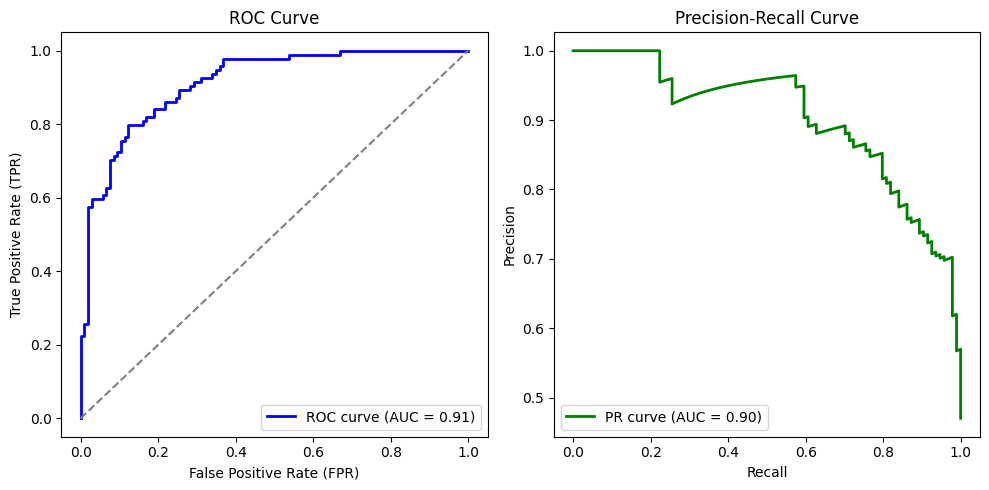

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# вероятность принадлежности к классу 1
y_prob = logistic_regression.predict_proba(X_test)[:, 1]  

# ROC-AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# PR-AUC
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# ROC-кривая
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# PR-кривая
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

- У модели отличное качество (хорошо различает классы), так как значение ROC-AUC близко к 1.
-  У модели отличное качество (достигает высокой точности при высокой полноте), так как PR-AUC близко к 1.

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

- Тут получили предупреждение о том, что модель не смогла сойтись за указанное количество итераций (max_iter=1000). Возможно, это связано с тем, что данные не были масштабированы.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import time

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

print("Логистическая регрессия без предобработки:")
logreg = LogisticRegression(max_iter=1000, random_state=124)
logreg.fit(X_train, y_train)

# оценка качества
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print("Train metrics:")
print(classification_report(y_train, y_train_pred))
print("Test metrics:")
print(classification_report(y_test, y_test_pred))



Логистическая регрессия без предобработки:


/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train metrics:


/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

Test metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?


- Модель также не смогла предсказать ни одного объекта класса 1 (водителей, которые воспользуются страховкой). Может, это связано с неравенством классов (класс 0 доминирует).
- Время на обучение показало 1,44 секунды.
- Получили признаков после предобработки: 57

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Количество признаков после предобработки: {X_train_processed.shape[1]}")

# лог регрессия на предобработанных данных
print("Логистическая регрессия на предобработанных данных:")
logreg_processed = LogisticRegression(max_iter=1000, random_state=124)
start_time = time.time()
logreg_processed.fit(X_train_processed, y_train)
end_time = time.time()

print(f"Время обучения: {end_time - start_time:.2f} секунд")

# оценка качества
y_train_pred_processed = logreg_processed.predict(X_train_processed)
y_test_pred_processed = logreg_processed.predict(X_test_processed)

print("Train metrics (processed):")
print(classification_report(y_train, y_train_pred_processed))
print("Test metrics (processed):")
print(classification_report(y_test, y_test_pred_processed))

Количество признаков после предобработки: 57
Логистическая регрессия на предобработанных данных:
Время обучения: 1.44 секунд
Train metrics (processed):


/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

Test metrics (processed):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maria/Desktop/Python/python_for_andan-1/venv_name/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

- Этот код не запускался 4 минуты...
- Метрики и качество в целом на трейне и тесте в целом не улучшились. После классифаера улучшилось предсказание 1-ого класса, но  точность и полнота для класса 0 ухудшились.

In [ ]:
print("SGDClassifier с GridSearchCV:")
sgd = SGDClassifier(random_state=124, class_weight='balanced')
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'loss': ['log_loss'], 
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

# оценка качества
y_train_pred_sgd = grid_search.predict(X_train_processed)
y_test_pred_sgd = grid_search.predict(X_test_processed)

print("Train metrics (SGD):")
print(classification_report(y_train, y_train_pred_sgd))
print("Test metrics (SGD):")
print(classification_report(y_test, y_test_pred_sgd))

SGDClassifier с GridSearchCV:
Лучшие параметры: {'alpha': 0.01, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'elasticnet'}
Train metrics (SGD):
              precision    recall  f1-score   support

           0       0.97      0.62      0.76    458796
           1       0.05      0.55      0.10     17373

    accuracy                           0.62    476169
   macro avg       0.51      0.59      0.43    476169
weighted avg       0.94      0.62      0.73    476169

Test metrics (SGD):
              precision    recall  f1-score   support

           0       0.97      0.62      0.76    114722
           1       0.05      0.56      0.10      4321

    accuracy                           0.62    119043
   macro avg       0.51      0.59      0.43    119043
weighted avg       0.94      0.62      0.73    119043

